# Support Vector Machines in Python

We will build a **Support Vector Machine (SVM)** for **classification** (see figure below) using **scikit-learn** with the **Radial Basis Function (RBF) Kernel**.  
The dataset comes from the **[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)** and contains both continuous and categorical features. The objective is to predict whether a patient has **[heart disease](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)**.

<img src="svm.png" alt="A Support Vector Machine" style="width: 600px;">

**Support Vector Machines** are powerful models that work especially well when obtaining the most accurate prediction is more important than explaining why the prediction was made. They are also well-suited for relatively small datasets.  

This notebook covers:  
- **[Importing the Dataset](#download-the-data)**
- **[Handling Missing Data](#identify-and-deal-with-missing-data)**
  - Detecting missing values  
  - Dealing with missing values  
- **[Formatting the Data for SVMs](#format-the-data)**
  - Splitting into independent and dependent variables  
  - One-hot encoding  
  - Centering and scaling features  
- **[Building an Initial Support Vector Machine](#build-svm)**
- **[Optimizing Hyperparameters with Cross-Validation](#optimize-svm)**
  - Using cross-validation to find the best values for Gamma and Regularization  
- **[Building, Evaluating, Visualizing, and Interpreting the Final Model](#draw-svm)**

#### Note
It is assumed that you are already familiar with **Python**, as well as the concepts of **Support Vector Machines**, the **RBF kernel**, **regularization**, **cross-validation**, and **confusion matrices**.


#### Note
To fully understand the material, you should already be comfortable with the following:  
- **Python programming** basics  
- The theory behind **Support Vector Machines (SVMs)**  
- The **Radial Basis Function (RBF) kernel**  
- Concepts of **regularization** and **cross-validation**  
- How to interpret **confusion matrices**  


# Task 1: Import the Required Modules

Python by itself provides only the core programming language. To handle tasks such as importing data, cleaning and formatting it, and then building, evaluating, and visualizing a Support Vector Machine, additional modules are needed.  

**Required versions (or newer):**  
- pandas ≥ 0.25.1  
- numpy ≥ 1.17.2  
- scikit-learn ≥ 0.22.1  

When using **Python 3** installed with [Anaconda](https://www.anaconda.com/), the command `conda list` displays the installed versions.  
- To update all Anaconda packages: `conda update --all`  
- To update only scikit-learn: `conda install scikit-learn=0.22.1`  


In [1]:
import pandas as pd # pandas is used to load and manipulate data and for One-Hot Encoding
import numpy as np # numpy is used to calculate the mean and standard deviation
import matplotlib.pyplot as plt # matplotlib is for drawing graphs
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.preprocessing import scale # scale and center data
from sklearn.svm import SVC # this will make a support vector machine for classificaiton
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.metrics import confusion_matrix # this creates a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay # draws a confusion matrix
from sklearn.decomposition import PCA # to perform PCA to plot the data

<a id="download-the-data"></a>
# Task 2: Import the Data

The dataset used in this project comes from the **[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)**.  
Specifically, the **[Heart Disease Dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)** is selected, which contains information such as age, sex, blood pressure, and various medical measurements. The objective is to predict whether a patient is likely to have heart disease.  

**NOTE:** When **pandas** (`pd`) reads in data, it produces a **DataFrame**, which functions much like a spreadsheet. The data are organized into rows and columns, and each row can hold both text and numeric values. By convention, the variable name **df** is often used to represent a DataFrame, and that naming convention will be followed here.  


In [2]:
df = pd.read_csv("data set/heart+disease/processed.cleveland.data", header=None)

After the dataset is loaded into a **DataFrame** named **df**, the `head()` function can be used to display the first five rows.  

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


The dataset currently uses numeric column labels instead of descriptive names. Replacing these with meaningful column names makes it easier to understand and format the data. The following names will be applied to the columns:
- **age**,
- **sex**,
- **cp**, chest pain
- **restbp**, resting blood pressure (in mm Hg)
- **chol**, serum cholesterol in mg/dl
- **fbs**, fasting blood sugar
- **restecg**, resting electrocardiographic results
- **thalach**,  maximum heart rate achieved
- **exang**, exercise induced angina
- **oldpeak**, ST depression induced by exercise relative to rest
- **slope**, the slope of the peak exercise ST segment.
- **ca**, number of major vessels (0-3) colored by fluoroscopy
- **thal**, this is short of thalium heart scan.
- **hd**, diagnosis of heart disease, the predicted attribute

In [4]:
df.columns = ['age',
              'sex',
              'cp',
              'restbp',
              'chol',
              'fbs',
              'restecg',
              'thalach',
              'exang',
              'oldpeak',
              'slope',
              'ca',
              'thal',
              'hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


The numeric column labels have been replaced with descriptive, easy-to-remember names. With the dataset organized in the **DataFrame** **df**, the next step is to identify and handle **missing data**.

<a id="identify-and-deal-with-missing-data"></a>
# Task 3: Missing Data Part 1: Identifying Missing Data

A critical part of any data analysis project is ensuring that the dataset is correctly formatted and handling issues when it is not. One common issue is **missing data**.  

**Missing data** refers to blank spaces or placeholder values that indicate a failure to collect information for a specific feature. For example, if a person's age was not recorded, the dataset will contain a missing value for that individual's **age**.  

There are two main strategies for handling missing data:  
1. **Remove rows with missing values**: This approach is simple but can result in the loss of valuable information. The impact depends on the importance of the missing feature. For instance, if **age** is missing but not crucial for predicting heart disease, discarding the entire row may be unnecessary.  
2. **Impute missing values**: Imputation involves estimating an appropriate value to replace the missing entry. For example, missing values for **age** can be filled using the average, median, or a more sophisticated estimation method.  

This section focuses on identifying missing values in the dataset and applying suitable strategies to handle them.  

The next step is to examine the type of data present in each column.


In [5]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

Most columns in the dataset have the `float64` data type, while two columns, **ca** and **thal**, are of type `object`, and the column **hd** has type `int64`.  

The `object` type in **ca** and **thal** indicates that these columns may contain a mixture of values, such as numbers and letters. Ideally, both **ca** and **thal** should contain only a few discrete values representing different categories. Examining their unique values can help identify any irregularities, starting with the **ca** column.

In [6]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

The **ca** column contains numeric values (0.0, 1.0, 2.0, 3.0) as well as question marks (`?`). The numbers indicate the count of blood vessels visualized by fluoroscopy, while the question marks represent missing data.  

The next step is to examine the unique values present in the **thal** column.

In [32]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

The **thal** column similarly contains a mixture of numeric values, which correspond to different diagnoses from the thallium heart scan, and question marks (`?`) representing missing values.

# Task 4: Missing Data Part 2: Handling Missing Data

Scikit-learn's Support Vector Machines do not support datasets with missing values. The question marks (`?`) in the dataset indicate missing entries that must be addressed.  

There are two main approaches: remove the rows containing missing values or impute appropriate values for the missing data.  
Before deciding, it is useful to determine how many rows contain missing values.

In [33]:
len(df.loc[(df['ca']=='?')|(df['thal']=='?')])

6

Only 6 rows in the dataset contain missing values. These rows can be examined to understand the nature of the missing data.

In [9]:
df.loc[(df['ca'] == '?') | (df['thal'] == '?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


The total number of rows in the dataset can be counted to understand the dataset's size.

In [34]:
len(df)

303

Out of the **303** rows, 6 rows (approximately **2%**) contain missing values. With **297** complete rows remaining, there is sufficient data to build a Support Vector Machine. Therefore, the rows containing question marks in either the **ca** or **thal** columns can be removed from the dataset.


In [11]:
df_no_missing=df.loc[(df['ca']!='?') & (df['thal']!='?')]

The `df_no_missing` DataFrame has 6 fewer rows than the original `df`, resulting in a total of **297** rows.

In [35]:
len(df_no_missing)

297

The row removal has been completed successfully. The **ca** column can be checked to confirm that it no longer contains question marks by examining its unique values.

In [36]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

Similarly, the **thal** column can be checked to confirm that all missing values have been removed by examining its unique values.

In [37]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

The `df_no_missing` DataFrame has been verified to contain no missing values.  

**NOTE:** The **ca** and **thal** columns still have the `object` data type, which is acceptable. The dataset is now ready to be formatted for building a **Support Vector Machine**.

<a id="format-the-data"></a>
# Task 5: Format Data Part 1: Split the Data into Dependent and Independent Variables

With missing data addressed, the next step is formatting the dataset for use with a **Support Vector Machine**.  

The dataset can be divided into two parts:  
1. The features (independent variables) used for making classifications  
2. The target (dependent variable) to be predicted  

Conventional notation uses `X` (capital **X**) for the features and `y` (lowercase **y**) for the target variable. In this case, the target variable is **hd** (heart disease).  

**NOTE:** The `copy()` method is used to create copies of the data *by value*. By default, pandas copies *by reference*, which can lead to unintentional modifications of the original `df_no_missing` DataFrame. Using `copy()` ensures that formatting changes to `X` or `y` do not affect the original dataset, allowing the original data to be reused if needed.

In [38]:
X=df_no_missing.drop('hd',axis=1).copy()
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [39]:
y = df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

<a id="one-hot-encoding"></a>
# Task 6: Format the Data Part 2: One-Hot Encoding

After splitting the dataset into `X` (features) and `y` (target variable), it is important to examine the types of variables in `X`. The table below describes each variable, its meaning, and whether it is **float** or **categorical**:

- **age** — Float  
- **sex** — Category  
  - 0 = female  
  - 1 = male  
- **cp** (chest pain) — Category  
  - 1 = typical angina  
  - 2 = atypical angina  
  - 3 = non-anginal pain  
  - 4 = asymptomatic  
- **restbp** (resting blood pressure in mm Hg) — Float  
- **chol** (serum cholesterol in mg/dl) — Float  
- **fbs** (fasting blood sugar) — Category  
  - 0 = <120 mg/dl  
  - 1 = ≥120 mg/dl  
- **restecg** (resting electrocardiographic results) — Category  
  - 1 = normal  
  - 2 = ST-T wave abnormality  
  - 3 = probable or definite left ventricular hypertrophy  
- **thalach** (maximum heart rate achieved) — Float  
- **exang** (exercise-induced angina) — Category  
  - 0 = no  
  - 1 = yes  
- **oldpeak** (ST depression induced by exercise relative to rest) — Float  
- **slope** (slope of the peak exercise ST segment) — Category  
  - 1 = upsloping  
  - 2 = flat  
  - 3 = downsloping  
- **ca** (number of major vessels colored by fluoroscopy, 0–3) — Float  
- **thal** (thalium heart scan) — Category  
  - 3 = normal (no cold spots)  
  - 6 = fixed defect (cold spots during rest and exercise)  
  - 7 = reversible defect (cold spots appearing only during exercise)  

Examining the data types in `X` provides an overview of how Python currently interprets each variable.

In [40]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

The columns **age**, **restbp**, **chol**, and **thalach** are all `float64`, which is appropriate for continuous numeric data. Other columns require inspection to ensure they contain only valid values, and some may need to be converted.  

While **scikit-learn Support Vector Machines** natively support continuous features such as resting blood pressure (**restbp**) and maximum heart rate (**thalach**), they do not directly support categorical features, such as chest pain (**cp**), which has four categories. Categorical data must be converted into multiple binary columns using **One-Hot Encoding** before being used with SVMs.  

Treating categorical data as continuous can introduce misleading assumptions. For example, the **cp** (chest pain) column has four categories:  
1. typical angina  
2. atypical angina  
3. non-anginal pain  
4. asymptomatic  

If these values (1, 2, 3, 4) were treated as continuous, the model might incorrectly assume that 4 ("asymptomatic") is more similar to 3 ("non-anginal pain") than to 1 or 2, affecting clustering and classification. By treating them as categorical, each value is considered a separate, equally distinct category, which provides a more reasonable interpretation for the model.  

The next step is to inspect and, if necessary, convert columns containing categorical or integer data to the correct datatypes. Starting with **cp** (chest pain), its unique values can be examined to ensure proper formatting.

In [41]:
X['cp'].unique()

array([1., 4., 3., 2.])

The **cp** column contains only the expected values. Using **One-Hot Encoding**, it can be transformed into a series of columns containing only **0s** and **1s**, representing the presence of each category.

**NOTE:** There are multiple approaches to perform **One-Hot Encoding** in Python. Two common methods are `ColumnTransformer()` from **scikit-learn** and `get_dummies()` from **pandas**, each with advantages and trade-offs.  

- `ColumnTransformer()` can create a persistent function that validates future input. For example, if an SVM is trained on a categorical variable like **favorite color** with options **red**, **blue**, and **green**, `ColumnTransformer()` can later detect unexpected values such as **orange** and handle them appropriately. The drawback is that it converts data into arrays, removing column names, which can make verification more difficult.  
- `get_dummies()` keeps the data in a DataFrame and preserves column names, making it easier to verify the transformation. However, it does not retain persistent validation for future data.  

For learning purposes, `get_dummies()` provides a clear and understandable demonstration of **One-Hot Encoding**. Once familiar with the process, exploring `ColumnTransformer()` for production use is recommended.  

Before applying **One-Hot Encoding** to **cp** permanently, it is informative to observe the transformation without saving the results to understand how `get_dummies()` operates.

In [42]:
pd.get_dummies(X, columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,True,False,False,False
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,False,False,False,True
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,False,False,True,False
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,False,True,False,False


The `get_dummies()` function places all columns that are not being processed at the front and appends the processed column at the end. In this case, **cp** is split into four separate columns as expected:  

- **cp_1.0** = 1 if chest pain is 1, otherwise 0  
- **cp_2.0** = 1 if chest pain is 2, otherwise 0  
- **cp_3.0** = 1 if chest pain is 3, otherwise 0  
- **cp_4.0** = 1 if chest pain is 4, otherwise 0  

This demonstrates how `get_dummies()` transforms a categorical variable into multiple binary columns.  

The same **One-Hot Encoding** approach can be applied to the four categorical columns with more than two categories, and the results can be saved.  

**NOTE:** In practice, it is important to verify all categorical columns to ensure they contain only the accepted categories.


In [43]:
X_encoded=pd.get_dummies(X, columns=['cp','restecg','slope','thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,True,...,False,False,False,True,False,False,True,False,True,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,False,...,True,False,False,True,False,True,False,True,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,False,...,True,False,False,True,False,True,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,False,...,False,True,False,False,False,False,True,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,False,...,False,False,False,True,True,False,False,True,False,False


# Task 7: Handling Binary Categorical Columns

The three categorical columns that contain only **0s** and **1s** are **sex**, **fbs** (fasting blood sugar), and **exang** (exercise-induced angina).  

Unlike columns with more than two categories (e.g., **cp**), these binary columns already use 0 and 1 to represent their categories. Therefore, no additional **One-Hot Encoding** is required, and the data is now fully formatted for use with a **Support Vector Machine**.  

**NOTE:** In practice, using the `unique()` method to confirm that these columns contain only 0s and 1s is recommended.


Before building the Support Vector Machine, it is important to note that `y` contains more than just **0s** and **1s**. It has **5** levels indicating the presence and severity of heart disease:  

- 0 = no heart disease  
- 1–4 = varying degrees of heart disease  

The `unique()` function can be used to view these levels.

In [44]:
y.unique()

array([0, 2, 1, 3, 4])

For a simple classification task focused only on whether a patient has heart disease, all values in `y` greater than 0 can be converted to **1**, representing the presence of heart disease.

In [45]:
y_not_zero_idx=y>0
y[y_not_zero_idx]=1
y.unique()

array([0, 1])

# Task 8: Data Formatting Complete

The dataset is now fully formatted and ready for building a **Support Vector Machine**.

<a id="center-and-scale"></a>
# Task 7: Format the Data Part 3: Centering and Scaling

The **Radial Basis Function (RBF)** kernel used with the **Support Vector Machine** assumes that the input data are centered and scaled. Therefore, both the training and testing datasets should be centered and scaled accordingly.  

**NOTE:** Scaling is applied separately to the training and testing datasets to prevent **Data Leakage**. Data leakage occurs when information from the training set inadvertently influences the testing set, potentially biasing the model evaluation.

In [46]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)
X_train_scaled=scale(X_train)
X_test_scaled=scale(X_test)

<a id="build-svm"></a>
# Task 8: Build a Preliminary Support Vector Machine

The dataset is now fully prepared and formatted for constructing a **Support Vector Machine**.

In [47]:
clf_svm=SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


The **Support Vector Machine** for classification has been built. Its performance on the **testing dataset** can be evaluated using a **confusion matrix**.

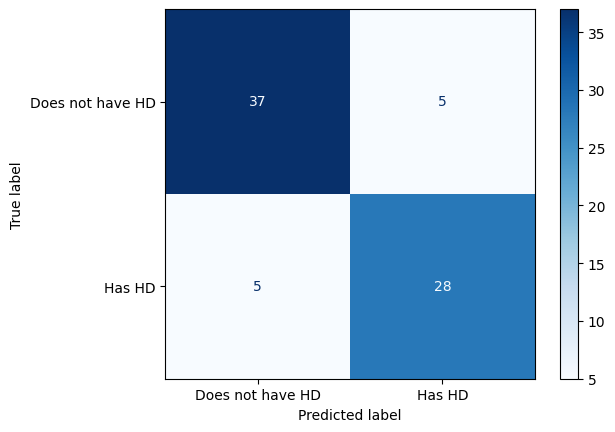

In [48]:
ConfusionMatrixDisplay.from_estimator(clf_svm, 
                                      X_test_scaled, 
                                      y_test, display_labels=["Does not have HD","Has HD"], 
                                      cmap="Blues")

The confusion matrix shows that out of **42** people without **Heart Disease** (**37 + 5**), **37 (88%)** were correctly classified. Out of **33** people with **Heart Disease** (**5 + 28**), **28 (85%)** were correctly classified.  

These results indicate that the Support Vector Machine performs reasonably well without parameter optimization. Further improvement in predictions may be possible using **cross-validation** to optimize the model's parameters.

----

<a id="optimize-svm"></a>
# Task 9: Optimize Parameters with Cross-Validation

Optimizing a **Support Vector Machine** involves finding the best values for **gamma** and, potentially, the regularization parameter **C**. Cross-validation can help identify parameter combinations that improve accuracy on the **testing dataset**.  

With two parameters to optimize, `GridSearchCV()` is used by specifying a range of possible values for **gamma** and **C**. `GridSearchCV()` evaluates all combinations to determine the optimal parameters.

In [49]:
param_grid=[
    {'C': [1,10,100,1000],
     'gamma': [0.001, 0.0001],
     'kernel': ['rbf']},
]
optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    verbose=0
)
optimal_params.fit(X_train_scaled, y_train)
optimal_params.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

The optimal parameter values determined through cross-validation are **C = 10** and **gamma = 0.001**.

---

<a id="draw-svm"></a>
# Task 10: Building, Evaluating, Drawing, and Interpreting the Final Support Vector Machine

With the optimal values for `C` and `gamma`, the final **Support Vector Machine** can be constructed.

In [50]:
clf_svm=SVC(random_state=42, C=10, gamma=0.001)
clf_svm.fit(X_train_scaled, y_train)

,C,10
,kernel,'rbf'
,degree,3
,gamma,0.001
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


A confusion matrix can be generated to evaluate whether the optimized Support Vector Machine improves classification performance.

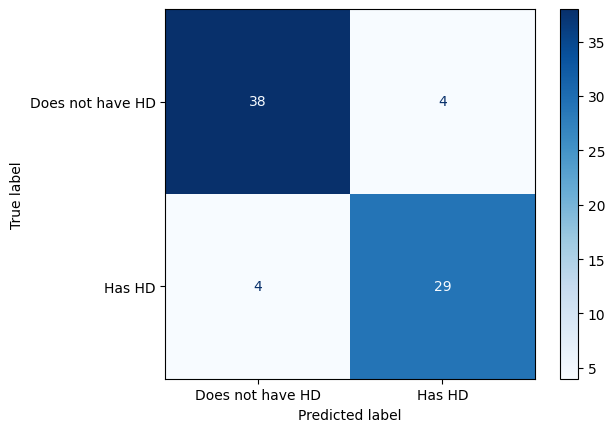

In [51]:
ConfusionMatrixDisplay.from_estimator(clf_svm, 
                                      X_test_scaled, 
                                      y_test, display_labels=["Does not have HD", "Has HD"], 
                                      cmap="Blues")

The optimized **Support Vector Machine** shows improved classification performance compared to the preliminary model.  

- Out of **42** people without heart disease (**38 + 4**), **38 (90%)** were correctly classified, an improvement over the preliminary SVM, which correctly classified **37 (88%)**.  
- Out of **33** people with heart disease (**4 + 29**), **29 (87%)** were correctly classified, compared to **28 (85%)** for the preliminary SVM.  

Optimizing the parameters enhances the model's accuracy for both classes.

The final step is to visualize the decision boundary of the optimized Support Vector Machine and interpret its meaning.  

The number of columns in **X** should be counted to understand the feature dimensionality.

In [52]:
len(df.columns)

14

The dataset contains **14** features (columns) in **X**. Visualizing all features would require a 14-dimensional graph, which is impractical.  

Instead of plotting just two randomly selected features, **PCA** (Principal Component Analysis) can be used to combine the 14 features into **2** orthogonal meta-features suitable for a 2-dimensional plot. PCA effectively reduces the dimensionality of the data while preserving as much variance as possible.  

Before creating a 2-dimensional graph, it is important to assess how accurately the reduced representation captures the original data. This can be evaluated using a **scree plot**, which helps determine whether the 2-dimensional projection is appropriate for visualization.

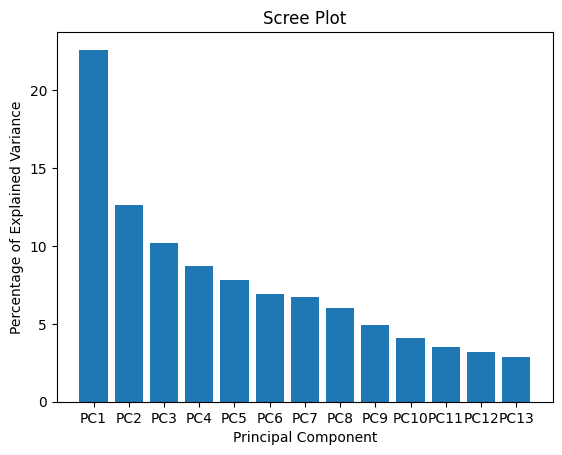

In [53]:
pca = PCA() # By default, PCA() centers the data, but does not scale it.
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

The scree plot indicates that the first principal component (PC1) captures a substantial portion of the variance in the data, making it suitable for the x-axis in a 2-dimensional graph. The second principal component (PC2), which captures the next largest amount of variance, can be used for the y-axis.  

A PCA-based 2-dimensional graph can then be drawn. **NOTE:** The code for this visualization is technical, but it includes comments that explain each step and does not require manual typing to understand the process.

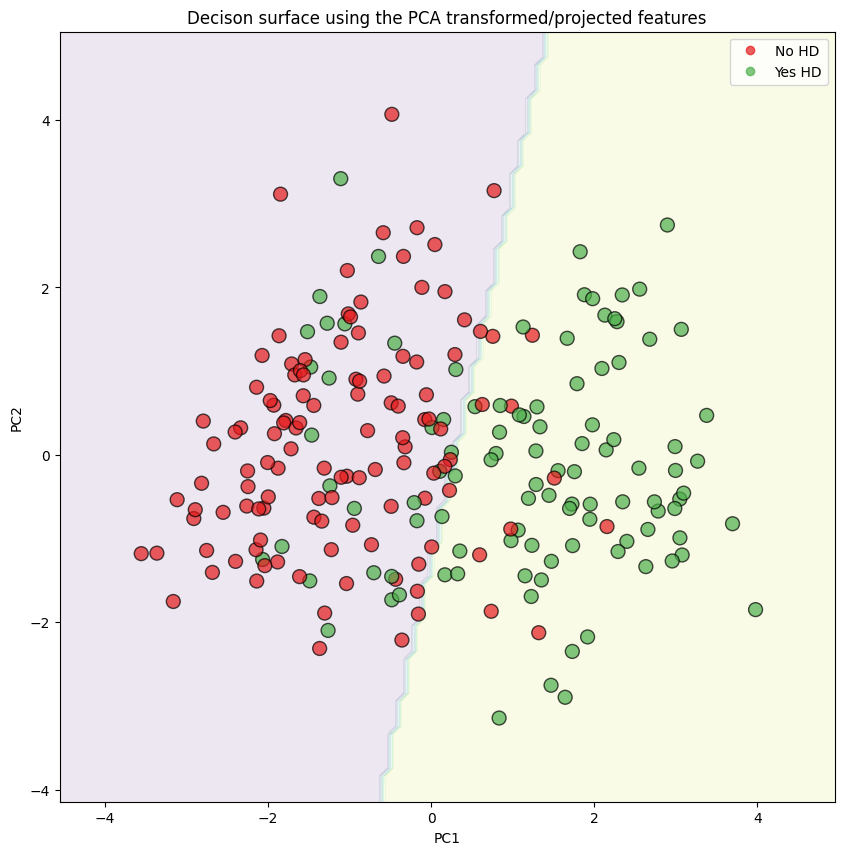

In [54]:
pc1 = X_train_pca[:, 0] 
pc2 = X_train_pca[:, 1]

## NOTE:
## pc1 contains the x-axis coordinates of the data after PCA
## pc2 contains the y-axis coordinates of the data after PCA

## Now we fittthe SVM to the x and y-axis coordinates
## of the data after PCA dimension reduction...
clf_svm.fit(np.column_stack((pc1, pc2)), y_train)

## Now create a matrix of points that we can use to show
## the decision regions.
## The matrix will be a little bit larger than the
## transformed PCA points so that we can plot all of
## the PCA points on it without them being on the edge
x_min = pc1.min() - 1
x_max = pc1.max() + 1

y_min = pc2.min() - 1
y_max = pc2.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))

## now we will classify every point in that 
## matrix with the SVM. Points on one side of the 
## classification boundary will get 0, and points on the other
## side will get 1.
Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
## Right now, Z is just a long array of lots of 0s and 1s, which
## reflect how each point in the mesh was classified.
## We use reshape() so that each classification (0 or 1) corresponds
## to a specific point in the matrix.
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,10))
## now we will use contourf() to draw a filled contour plot
## using the matrix values and classifications. 
## The contours will be filled according to the 
## predicted classifications (0s and 1s) in Z
ax.contourf(xx, yy, Z, alpha=0.1)

## now create custom colors for the actual data points
cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])
## now darw the actual data points - these will
## be colored by their known (not predcited) classifications
## NOTE: setting alpha=0.7 lets us see if we are covering up a point 
scatter = ax.scatter(pc1, pc2, c=y_train, 
               cmap=cmap, 
               s=100, 
               edgecolors='k', ## 'k' = black
               alpha=0.7)

## now create a legend
legend = ax.legend(scatter.legend_elements()[0], 
                   scatter.legend_elements()[1],
                    loc="upper right")
legend.get_texts()[0].set_text("No HD")
legend.get_texts()[1].set_text("Yes HD")

## now add axis labels and titles
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decison surface using the PCA transformed/projected features')
# plt.savefig('svm.png')
plt.show()

The left (pink) region of the graph represents areas where data points are predicted to *not have* heart disease, while the right (yellow) region represents areas where data points are predicted to *have* heart disease. The dots represent individual data points from the training dataset, color-coded by their actual classifications: red indicates patients without heart disease, and green indicates patients with heart disease.

# Conclusion

The workflow for creating a **Support Vector Machine** for heart disease classification included the following steps:

- **[Loading the Data from a File](#download-the-data)**
- **[Identifying and Handling Missing Data](#identify-and-deal-with-missing-data)**
- **[Formatting the Data for a Support Vector Machine using One-Hot Encoding](#one-hot-encoding)**
- **[Building a Preliminary Support Vector Machine for Classification](#build-svm)**
- **[Optimizing the Support Vector Machine with Cross-Validation](#optimize-svm)**
- **[Building, Visualizing, Interpreting, and Evaluating the Final Support Vector Machine](#draw-svm)**
